# Índice

#### 1. [Introdução](#1)
#### 2. [Análise e Limpeza dos Dados](#2)
#### 3. [Árvore de Decisão](#3)
#### 4. [Pré-poda e pós-poda](#4)
#### 5. [Outros ajustes](#5)
#### 6. [Conclusão](#6)

## 1. Introdução<a name="1"></a>

Neste caderno e em cadernos subsequentes iremos trabalhar com os dados de cancelamentos de agendamentos de estadias em dois hotéis de uma empresa em Portugal.

Nosso objetivo será treinar um modelo de classificação que consiga prever com certa precisão quando um hóspede deve cancelar uma reserva realizada, a fim de fornecer ao hotel a possibilidade de implementar medidas que reduzam a taxa de cancelamento, aumentando assim a taxa de ocupação e consequente receita do hotel.

Neste caderno realizaremos as primeiras análises dos dados e o primeiro treinamento de modelo, utilizando árvores de decisão.

- O resumo do trabalho pode ser acessado aqui: [resumo do trabalho](https://github.com/luckssm/hotel-booking/blob/main/relatorio_hotel_booking.pdf).
- O próximo caderno pode ser acessado aqui: [caderno PCA](https://github.com/luckssm/hotel-booking/blob/main/hotel_booking_PCA.ipynb).
- A base original pode ser acessada aqui: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

A base trabalhada possui os campos: 

| Variável | Tipo | Descrição |
| -------- | ---- | --------- |
| hotel                          |  object  | Hotel (H1 = Resort Hotel or H2 = City Hotel) |
| is_canceled                    |  int64   | Value indicating if the booking was canceled (1) or not (0) |
| lead_time                      |  int64   | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year              |  int64   | Year of arrival date |
| arrival_date_month             |  object  | Month of arrival date |
| arrival_date_week_number       |  int64   | Week number of year for arrival date |
| arrival_date_day_of_month      |  int64   | Day of arrival date |
| stays_in_weekend_nights        |  int64   | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| stays_in_week_nights           |  int64   | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| adults                         |  int64   | Number of adults |
| children                       |  float64 | Number of children |
| babies                         |  int64   | Number of babies |
| meal                           |  object  | Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner) |
| country                        |  object  | Country of origin. Categories are represented in the ISO 3155–3:2013 format |
| market_segment                 |  object  | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| distribution_channel           |  object  | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
| is_repeated_guest              |  int64   | Value indicating if the booking name was from a repeated guest (1) or not (0) |
| previous_cancellations         |  int64   | Number of previous bookings that were cancelled by the customer prior to the current booking |
| previous_bookings_not_canceled |  int64   | Number of previous bookings not cancelled by the customer prior to the current booking |
| reserved_room_type             |  object  | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| assigned_room_type             |  object  | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. |
| booking_changes                |  int64   | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation |
| deposit_type                   |  object  | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| agent                          |  float64 | ID of the travel agency that made the booking  |
| company                        |  float64 | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons |
| days_in_waiting_list           |  int64   | Number of days the booking was in the waiting list before it was confirmed to the customer |
| customer_type                  |  object  | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking |
| adr                            |  float64 | Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights |
| required_car_parking_spaces    |  int64   | Number of car parking spaces required by the customer |
| total_of_special_requests      |  int64   | Number of special requests made by the customer (e.g. twin bed or high floor) |
| reservation_status             |  object  | Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why |
| reservation_status_date        |  object | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel |

## 2. Análise e Limpeza dos Dados<a name="2"></a> 

Importações:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

Leitura do arquivo:

In [2]:
main = pd.read_csv('hotel_bookings.csv')
main

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

Informações dos campos:

In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Estatísticas das colunas, para entender mais profundamente cada uma, em questões de distribuição e valores:

-------------------------------------

valores da coluna hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


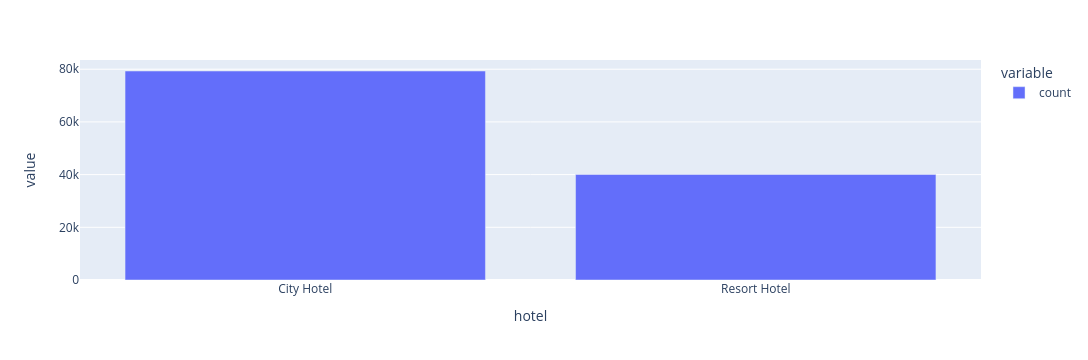





-------------------------------------

valores da coluna is_canceled:
is_canceled
0    75166
1    44224
Name: count, dtype: int64


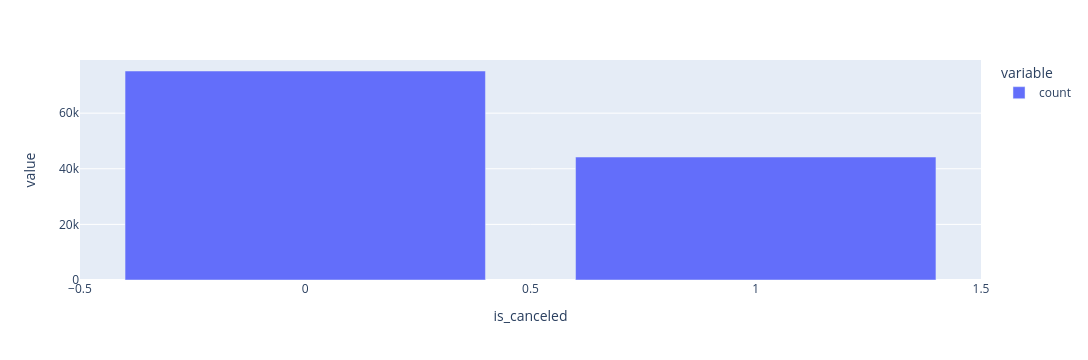





-------------------------------------

valores da coluna lead_time:
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64


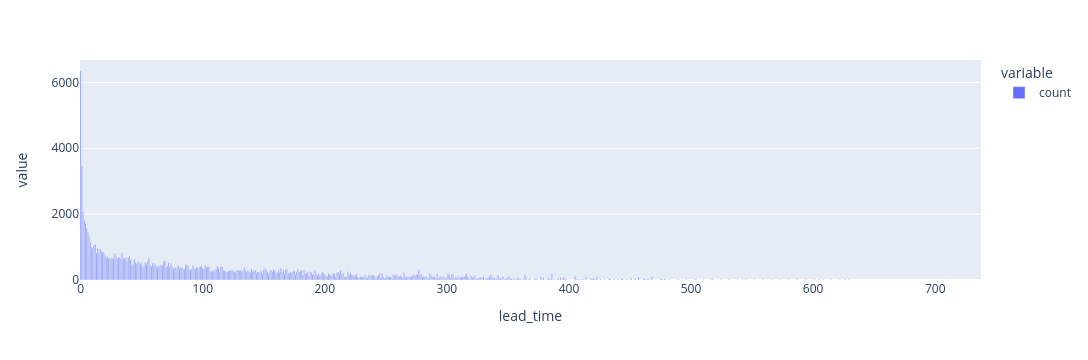





-------------------------------------

valores da coluna arrival_date_year:
arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64


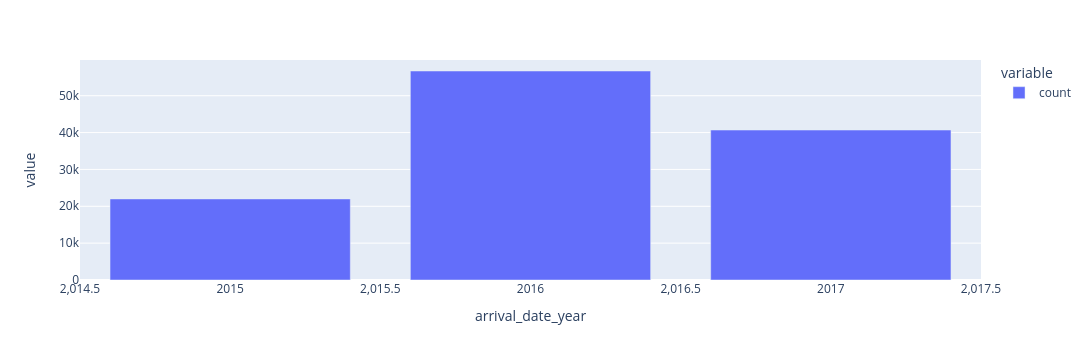





-------------------------------------

valores da coluna arrival_date_month:
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64


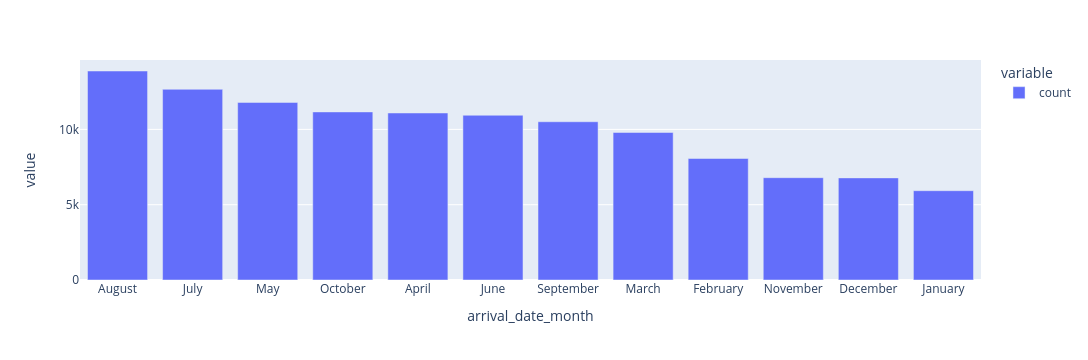





-------------------------------------

valores da coluna arrival_date_week_number:
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: count, dtype: int64


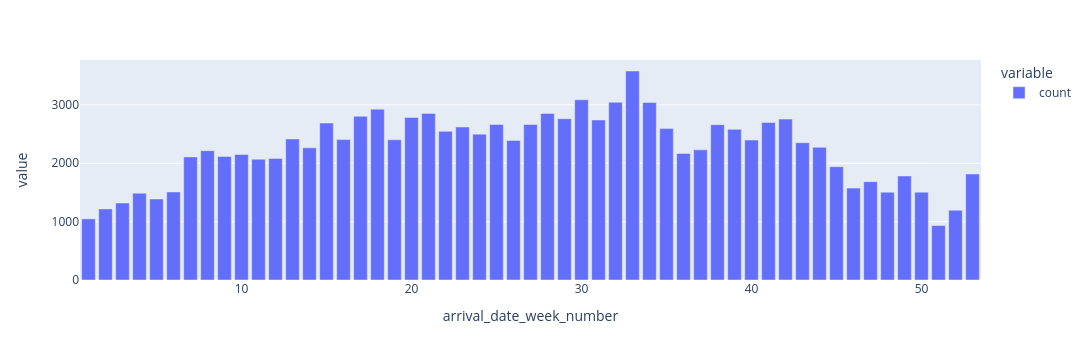





-------------------------------------

valores da coluna arrival_date_day_of_month:
arrival_date_day_of_month
17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: count, dtype: int64


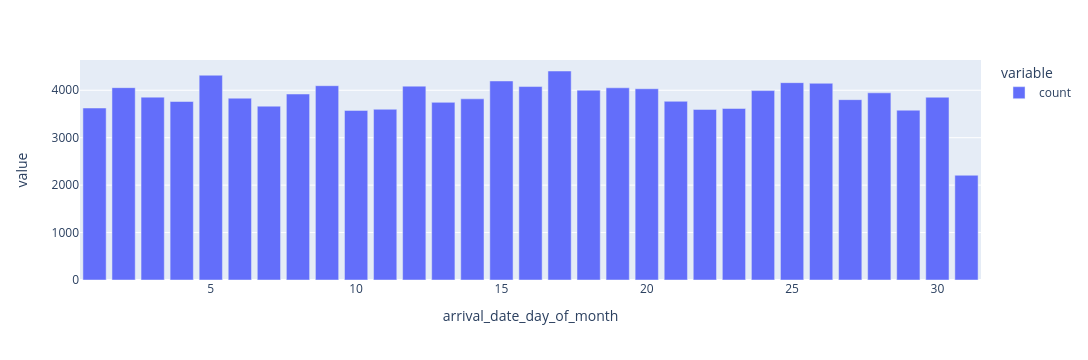





-------------------------------------

valores da coluna stays_in_weekend_nights:
stays_in_weekend_nights
0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: count, dtype: int64


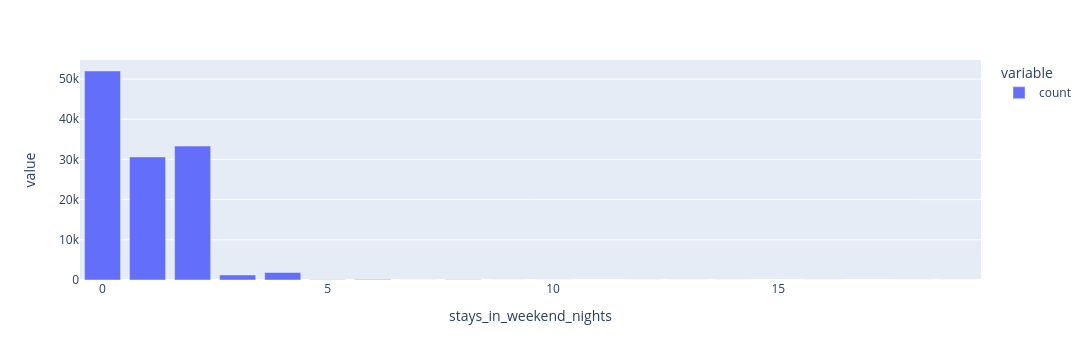





-------------------------------------

valores da coluna stays_in_week_nights:
stays_in_week_nights
2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
25        6
18        6
30        5
17        4
24        3
40        2
33        1
42        1
50        1
32        1
26        1
34        1
35        1
41        1
Name: count, dtype: int64


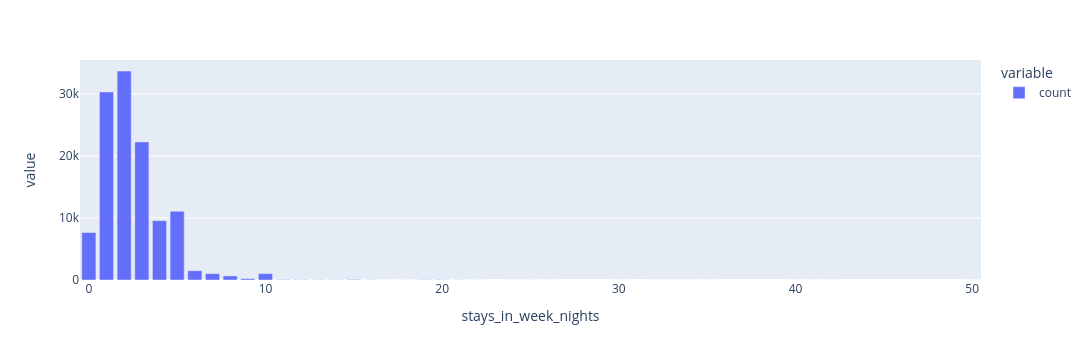





-------------------------------------

valores da coluna adults:
adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64


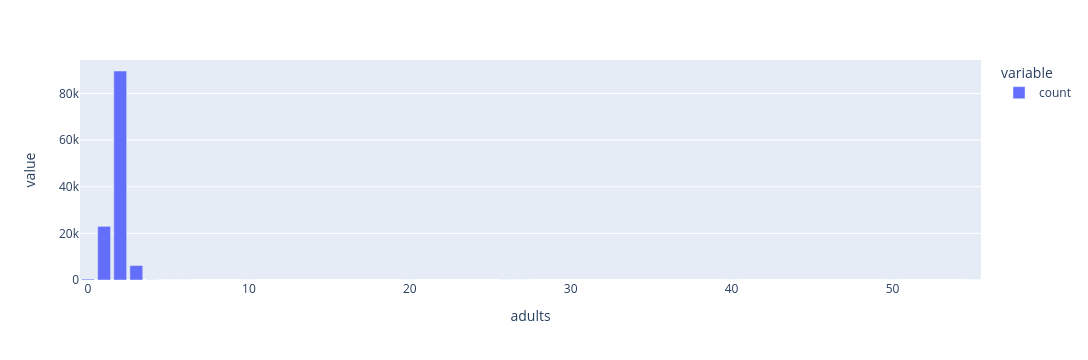





-------------------------------------

valores da coluna children:
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64


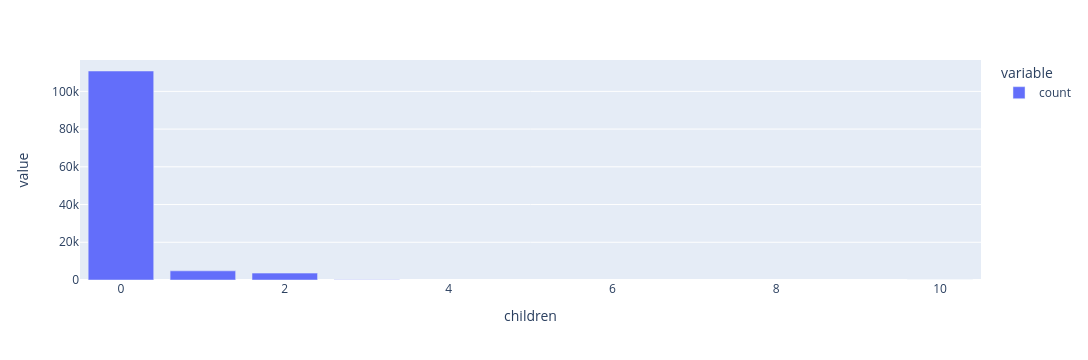





-------------------------------------

valores da coluna babies:
babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64


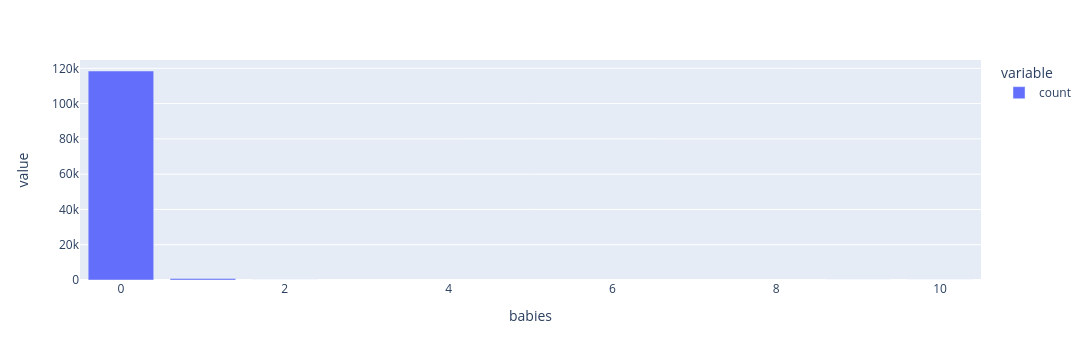





-------------------------------------

valores da coluna meal:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64


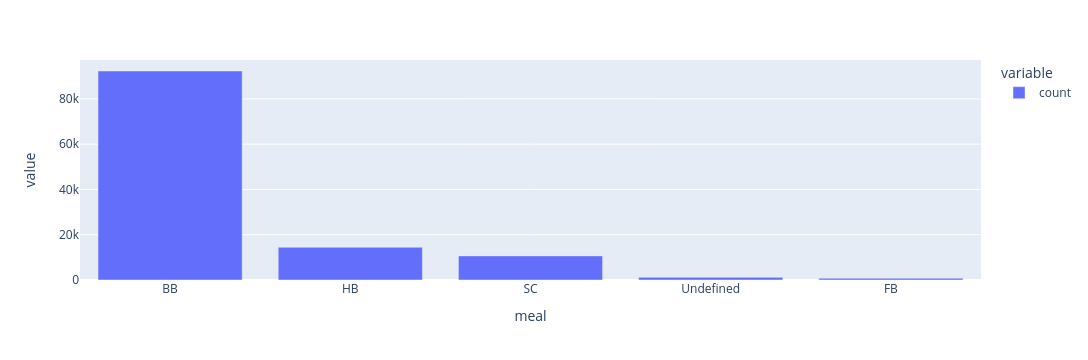





-------------------------------------

valores da coluna country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


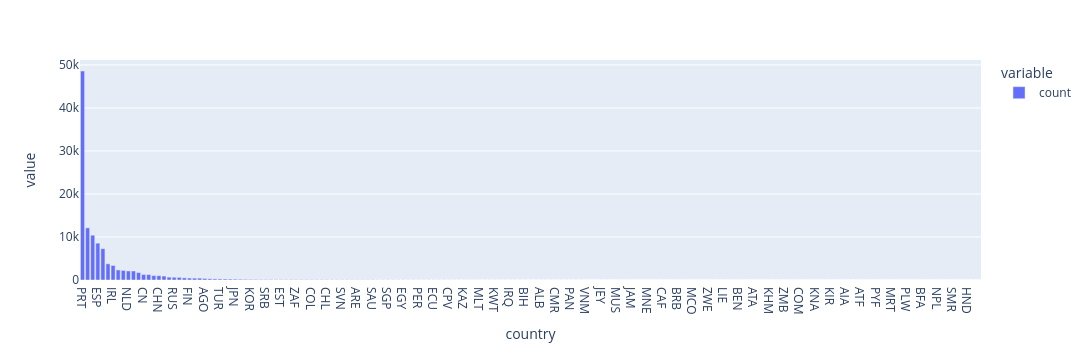





-------------------------------------

valores da coluna market_segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64


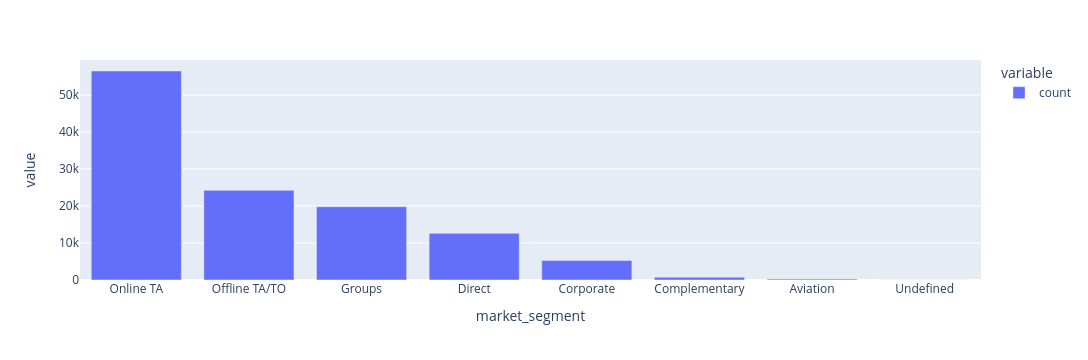





-------------------------------------

valores da coluna distribution_channel:
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64


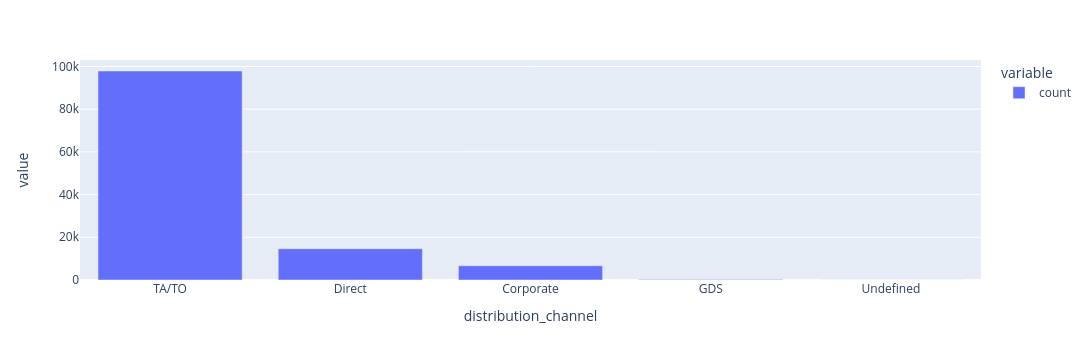





-------------------------------------

valores da coluna is_repeated_guest:
is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64


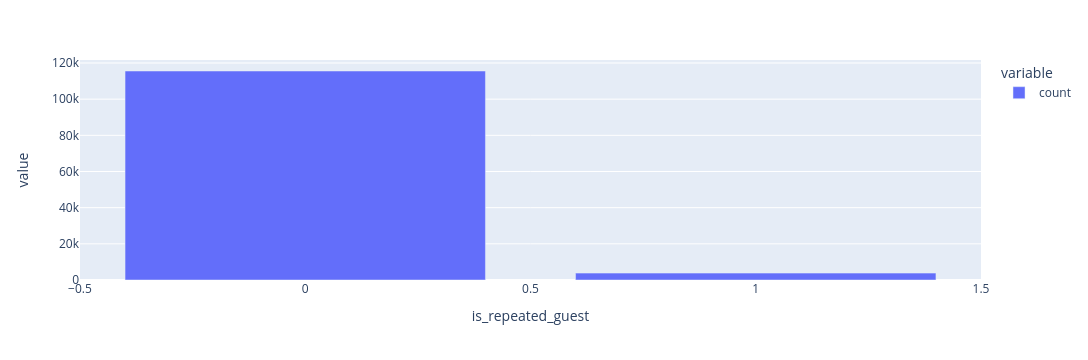





-------------------------------------

valores da coluna previous_cancellations:
previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64


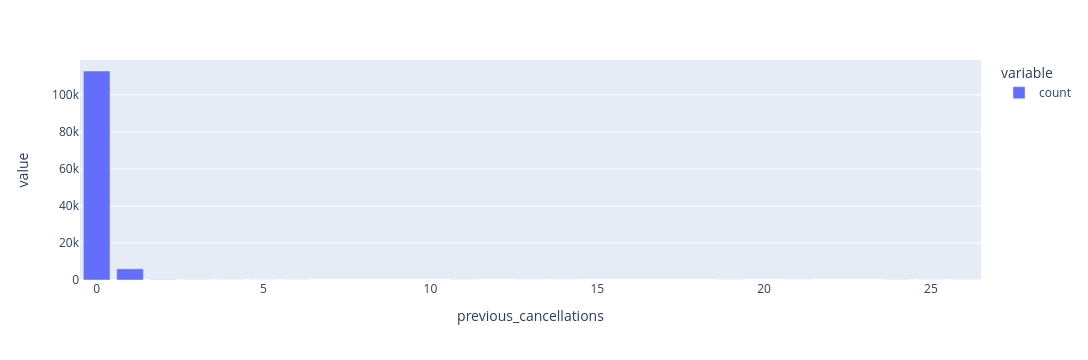





-------------------------------------

valores da coluna previous_bookings_not_canceled:
previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64


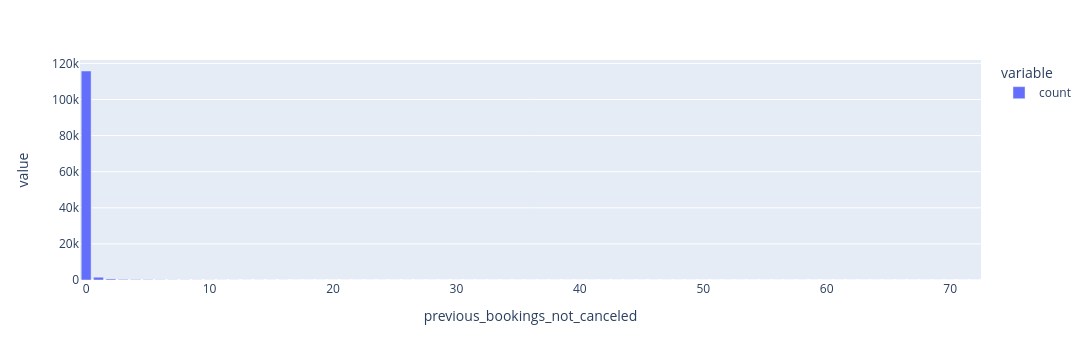





-------------------------------------

valores da coluna reserved_room_type:
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64


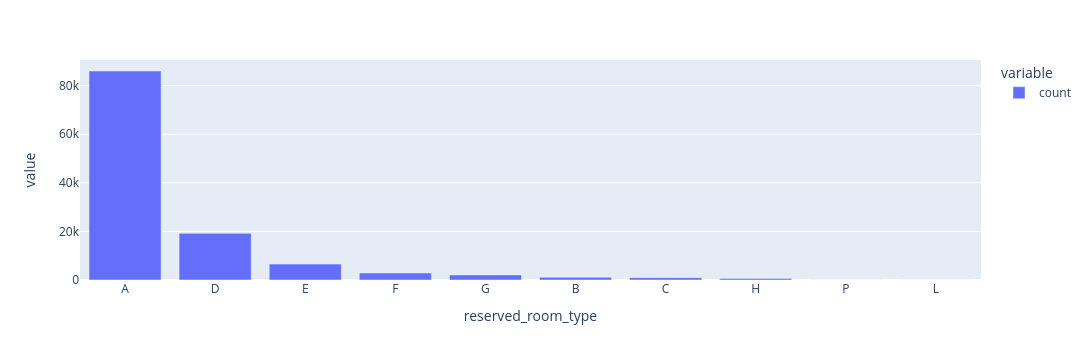





-------------------------------------

valores da coluna assigned_room_type:
assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64


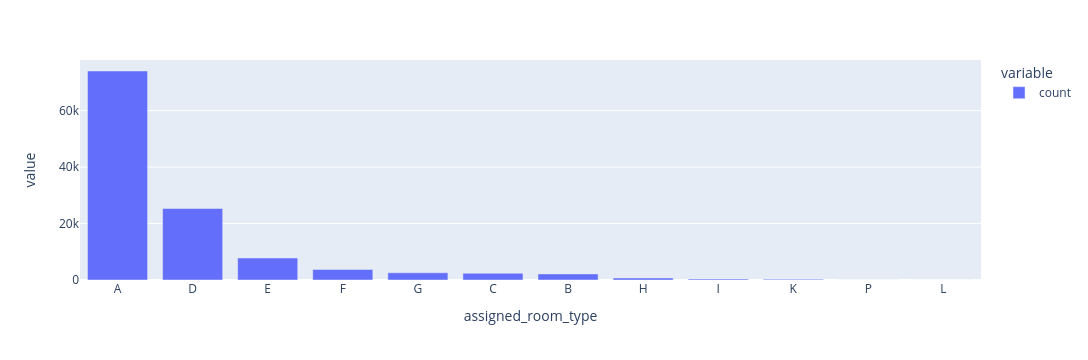





-------------------------------------

valores da coluna booking_changes:
booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64


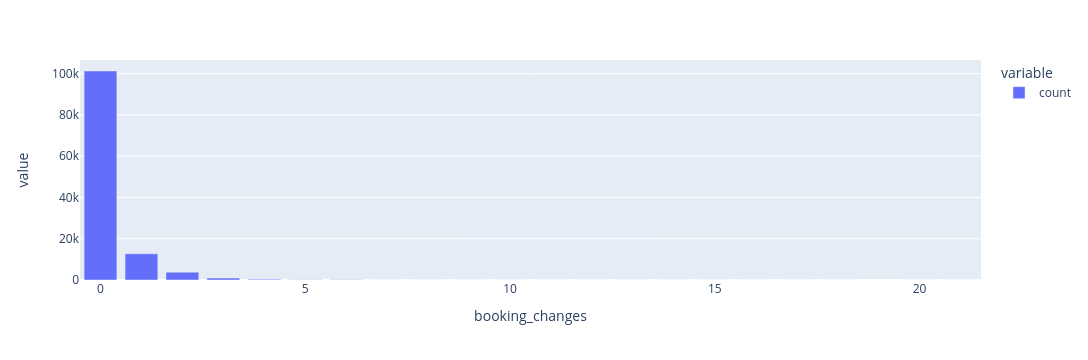





-------------------------------------

valores da coluna deposit_type:
deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64


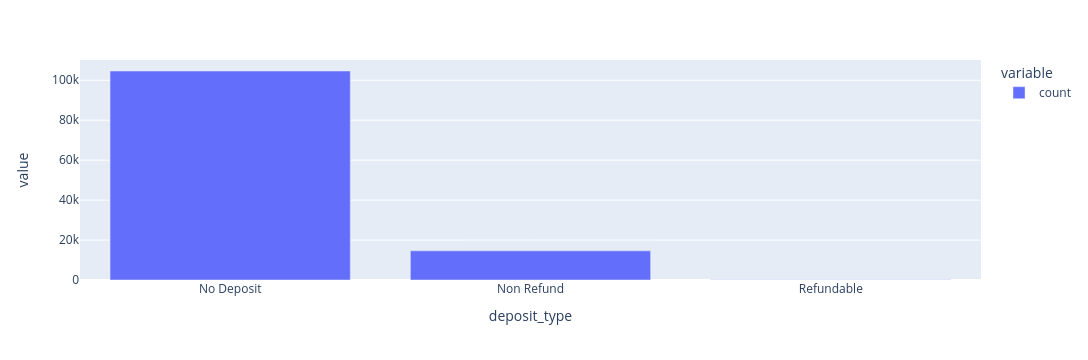





-------------------------------------

valores da coluna agent:
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


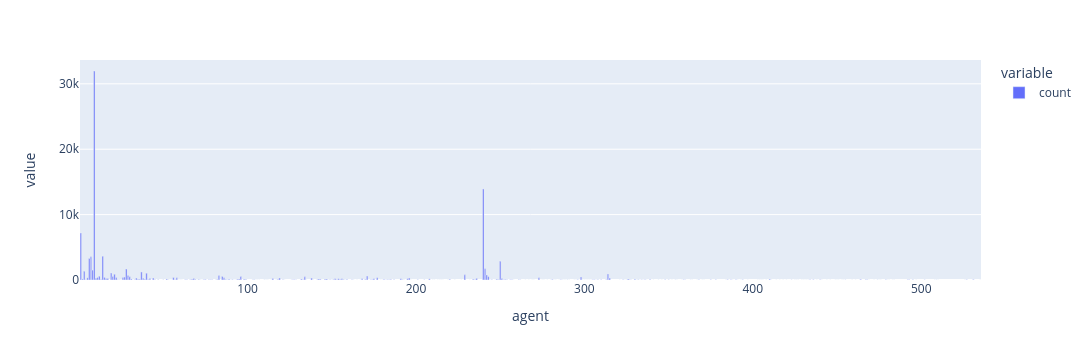





-------------------------------------

valores da coluna company:
company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64






-------------------------------------

valores da coluna days_in_waiting_list:
days_in_waiting_list
0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: count, Length: 128, dtype: int64






-------------------------------------

valores da coluna customer_type:
customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64






-------------------------------------

valores da coluna adr:
adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64






-------------------------------------

valores da coluna required_car_parking_spaces:
required_car_parking_spaces
0    111974
1      7383
2        28
3         3
8         2
Name: count, dtype: int64






-------------------------------------

valores da coluna total_of_special_requests:
total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64






-------------------------------------

valores da coluna reservation_status:
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64






-------------------------------------

valores da coluna reservation_status_date:
reservation_status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: count, Length: 926, dtype: int64


In [4]:
for column in main.columns:
    print('-------------------------------------\n')
    print(f'valores da coluna {column}:')
    print(main[column].value_counts())
    fig = px.bar(main[column].value_counts())
    fig.show()
    print('\n\n\n')

Verificando valores nulos, porque podem prejudicar a análise:

In [5]:
main.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Temos muitos valores nulos para `company`, mas se simplesmente retirarmos todos, vamos ficar sem nenhum dado, então não é a melhor opção. Nesse caso vamos simplesmente alterar o valor para **'-1'** quando a companhia não existir. Vamos fazer o mesmo para `agent`. Vamos fazer o mesmo para `children`.

In [6]:
main_clean = main.copy()
main_clean['company'] = main_clean.company.fillna(-1)
main_clean['agent'] = main_clean.agent.fillna(-1)
main_clean['children'] = main_clean.children.fillna(-1)
main_clean.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

Agora, falta apenas o país para ser tratado. O país possui uma questão mais sensível nesse caso. Vamos analisar as distribuições de cancelamento por país:

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


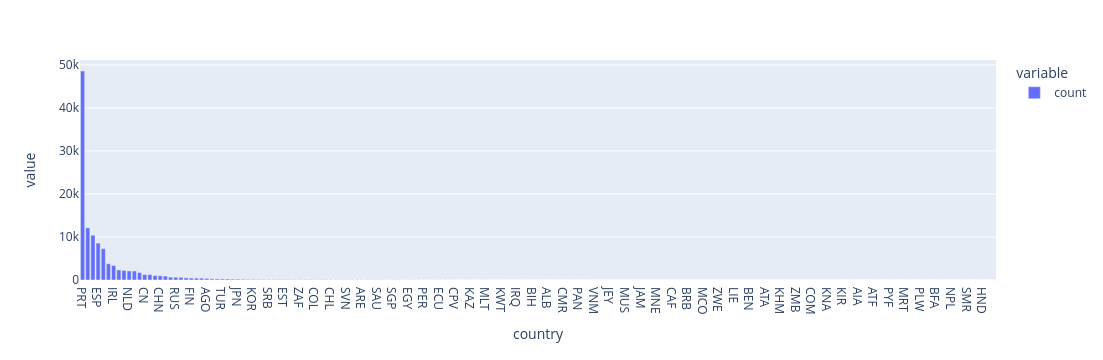

In [7]:
print(main['country'].value_counts())
fig = px.bar(main['country'].value_counts())
fig.show()

Temos muitos clientes que vêm de Portugal, o país de localização dos hotéis que estamos tabalhando, o que é natural. Vamos verificar se existe algum país que cancela mais:

country
PRT    27519
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
UMI        1
HND        1
FJI        1
SYC        1
CRI        1
Name: count, Length: 127, dtype: int64


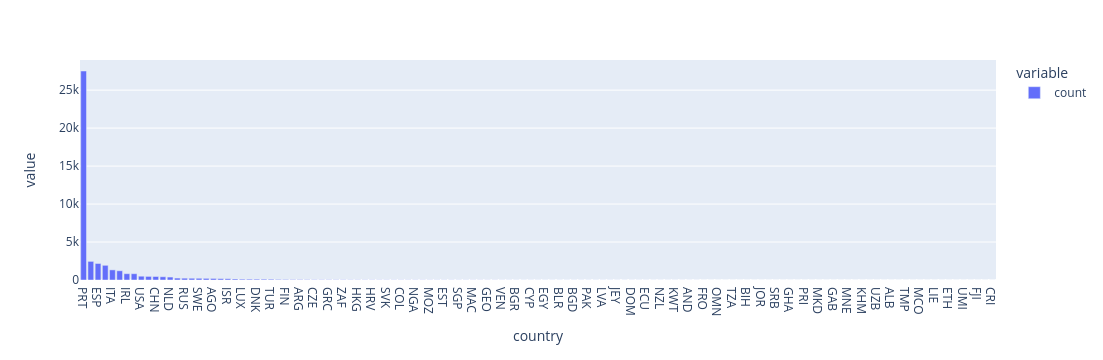

In [8]:
cancelations_by_country = main_clean[main_clean.is_canceled == 1].country.value_counts()
print(cancelations_by_country)
fig = px.bar(cancelations_by_country)
fig.show()

Portugal é o país que mais cancela. Como é o que mais agenda, é natural que seja o que mais cancela também. Vamos verificar os países por taxa de cancelamento. Primeiro, os países com uma taxa de 100% de cancelamento:

In [9]:
countries_percent_canceled = (main_clean.groupby(['country']).is_canceled.sum()/main_clean.groupby(['country']).is_canceled.count()).rename('cancelation_perc')
countries_percent_canceled_count = main_clean.groupby(['country']).is_canceled.count().rename('cancelation_count')
countries_cancelation_stats = pd.concat([countries_percent_canceled, countries_percent_canceled_count], axis=1)
countries_cancelation_stats[countries_cancelation_stats.cancelation_perc == 1].sort_values('cancelation_perc', ascending=False)

cancelation_perc  cancelation_count
country                                     
BEN                   1.0                  3
FJI                   1.0                  1
GGY                   1.0                  3
GLP                   1.0                  2
HND                   1.0                  1
IMN                   1.0                  2
JEY                   1.0                  8
KHM                   1.0                  2
MYT                   1.0                  2
NIC                   1.0                  1
UMI                   1.0                  1
VGB                   1.0                  1

Agora, os países com uma taxa de cancelamento maior do que 50%:

In [10]:
countries_cancelation_stats[(countries_cancelation_stats.cancelation_perc > 0.5) & (countries_cancelation_stats.cancelation_perc < 1)].sort_values('cancelation_perc', ascending=False)

cancelation_perc  cancelation_count
country                                     
MAC              0.937500                 16
HKG              0.896552                 29
TJK              0.888889                  9
ARE              0.843137                 51
BHR              0.800000                  5
FRO              0.800000                  5
BGD              0.750000                 12
MDV              0.750000                 12
QAT              0.733333                 15
SEN              0.727273                 11
AND              0.714286                  7
SAU              0.687500                 48
IDN              0.685714                 35
GEO              0.681818                 22
PAK              0.642857                 14
PHL              0.625000                 40
NGA              0.617647                 34
GIB              0.611111                 18
TZA              0.600000                  5
DOM              0.571429                 14
PRT              0.566351              48590
AGO              0.566298                362
AZE              0.529412                 17

Aqui já podemos verificar que o principal país de origem dos clientes do hotel, Portugal, tem uma taxa de 56% de cancelamento. Vamos verificar a taxa média de cancelamento do hotel para entendermos se essa é uma taxa alta ou baixa:

In [11]:
total_cancelation_rate = (main_clean.is_canceled.sum()/main_clean.is_canceled.count())*100
print(f'A taxa total de cancelamentos nesses hotéis é de {total_cancelation_rate:.2f}')

A taxa total de cancelamentos nesses hotéis é de 37.04


Temos uma taxa total de cancelamento de 37%, então a taxa dos clientes portugueses, de 56,63%, é sim relativamente alta.

De qualquer forma, vamos deixar essa lista de países para o hotel ficar mais atento com relação a reservas desses países, pois a chance de cancelamento dos hóspedes é bem alta e pode ser que o hotel queira realizar estratégias específicas para clientes desses países, ou tentar investigar o motivo desses cancelamentos através da obtenção de outros dados. 

No entanto, não vamos utilizar os dados de país de origem nos nossos modelos, para evitar possíveis discriminações referentes à nacionalidade dos hóspedes. Vamos focar simplesmente nas características das reservas e não das pessoas que reservaram.

Com isso, temos os dados finalmente limpos e sem campos com dados ausentes:

In [12]:
main_final = main_clean.copy()
main_final = main_final.drop('country', axis=1)
main_final.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Agora, vamos precisar transformar algumas variáveis categóricas em numéricas ou *dummies*, a fim de implementar nossos modelos (os modelos das ferramentas que iremos utilizar possuem a limitação de não conseguir trabalhar com variáveis categóricas).

Vamos verificar quais são nossas variáveis categóricas: 

In [13]:
main_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dentre nossas variáveis não numéricas, temos duas que vão acabar atrapalhando nossos modelos: `reservation_status` e `reservation_status_date`.

Como são variáveis relacionadas ao cancelamento ou não de uma reserva, que apenas adicionam informações complementares como a data em que o status da reserva mudou, elas não serão úteis nesse momento e serão removidas.

Temos também variáveis de meses da reserva, que iremos transformar para formato numérico: 1 = Janeiro, 2 = Fevereiro ... e assim por diante.

Faremos o mesmo para os tipos de quartos reservados e atribuídos: 1 = quarto '**A**', 2 = quarto '**B**' ... 13 = quarto '**P**'.

As outras variáveis serão simplesmente trasformadas em variáveis *dummies*.

In [14]:
main_dummies = main_final.drop([
    'reservation_status',
    'reservation_status_date'
], axis=1)

dict_months = {'January': 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10,
       "November": 11, "December": 12}

dict_room_type = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'P': 13
}


main_dummies = main_dummies.replace({
    "arrival_date_month": dict_months, 'reserved_room_type': dict_room_type, 'assigned_room_type': dict_room_type
})
main_dummies = pd.get_dummies(main_dummies)
main_dummies

/tmp/ipykernel_12771/226311932.py:14: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0                 0        342               2015                   7   
1                 0        737               2015                   7   
2                 0          7               2015                   7   
3                 0         13               2015                   7   
4                 0         14               2015                   7   
...             ...        ...                ...                 ...   
119385            0         23               2017                   8   
119386            0        102               2017                   8   
119387            0         34               2017                   8   
119388            0        109               2017                   8   
119389            0        205               2017                   8   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1   
1                             27                          1   
2                             27                          1   
3                             27                          1   
4                             27                          1   
...                          ...                        ...   
119385                        35                         30   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                             0                     0       2       0.0  ...   
1                             0                     0       2       0.0  ...   
2                             0                     1       1       0.0  ...   
3                             0                     1       1       0.0  ...   
4                             0                     2       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
119385                        2                     5       2       0.0  ...   
119386                        2                     5       3       0.0  ...   
119387                        2                     5       2       0.0  ...   
119388                        2                     5       2       0.0  ...   
119389                        2                     7       2       0.0  ...   

        distribution_channel_GDS  distribution_channel_TA/TO  \
0                          False                       False   
1                          False                       False   
2                          False                       False   
3                          False                       False   
4                          False                        True   
...                          ...                         ...   
119385                     False                        True   
119386                     False                        True   
119387                     False                        True   
119388                     False                        True   
119389                     False                        True   

        distribution_channel_Undefined  deposit_type_No Deposit  \
0                                False                     True   
1                                False                     True   
2                                False                     True   
3                                False                     True   
4                                False                     True   
...                                ...                      ...   
119385                           False                     True   
119386                           False                     True   
119387                           False   

Ficamos no final com um número significativo de 50 colunas. Mesmo assim, vamos prosseguir com a criação dos modelos e ao longo do processo realizaremos os ajustes necessários.

Vamos começar a criação dos modelos com a árvore de decisão. Mas antes, vamos dividir a amostra em treinamento e teste:

In [15]:
X = main_dummies.drop('is_canceled', axis=1)
y = main_dummies.is_canceled

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7412395)

## 3. Árvore de Decisão<a name="3"></a>

Vamos treinar o modelo:

In [16]:
clf = DecisionTreeClassifier(random_state=7412395)
clf = clf.fit(x_train, y_train)

E agora utilizar para obter as acurácias na base de treino e na base de teste:

In [17]:
y_pred_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred = clf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 99.24%
Acurácia na base de teste: 82.90%


Vamos fazer uma função auxiliar para plotar a matriz de confusão com os resultados previstos:

In [18]:
# Helper function that plots confusion matrix with its scores
def plot_confusion_matrix(y_true, y_pred, type):
    cm = confusion_matrix(y_true, y_pred)
    MatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                           display_labels=['Não cancelado', 'Cancelado']
                                          )
    MatrixDisplay.plot(cmap=plt.cm.Blues,values_format='g')
    
    tab = pd.crosstab(index = y_true, columns = y_pred)
    
    print(f'Acurácias de {type}:')

    # Predicted canceled, but is not canceled
    false_positive_acc = (tab.iloc[0, 1] / (tab.iloc[0, 1] + tab.iloc[0, 0])) * 100
    print(f'Modelo previu cancelado, mas é não cancelado: {false_positive_acc:.2f}%')
    
    # Predicted not canceled, and is not canceled
    true_negative_acc = (tab.iloc[0, 0] / (tab.iloc[0, 1] + tab.iloc[0, 0])) * 100
    print(f'Modelo previu não cancelado, e é não cancelado: {true_negative_acc:.2f}%')
    
    # Predicted not canceled, and is canceled
    false_negative_acc = (tab.iloc[1, 0] / (tab.iloc[1, 1] + tab.iloc[1, 0])) * 100
    print(f'Modelo previu não cancelado, mas é cancelado: {false_negative_acc:.2f}%')
    
    # Predicted canceled, and is canceled
    true_positive_acc = (tab.iloc[1, 1] / (tab.iloc[1, 1] + tab.iloc[1, 0])) * 100
    print(f'Modelo previu cancelado, e é cancelado: {true_positive_acc:.2f}%')

E agora vamos fazer a matriz de confusão para nossa base de treino e teste, com o percentual de acerto de cada classificação:

Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 0.36%
Modelo previu não cancelado, e é não cancelado: 99.64%
Modelo previu não cancelado, mas é cancelado: 1.43%
Modelo previu cancelado, e é cancelado: 98.57%


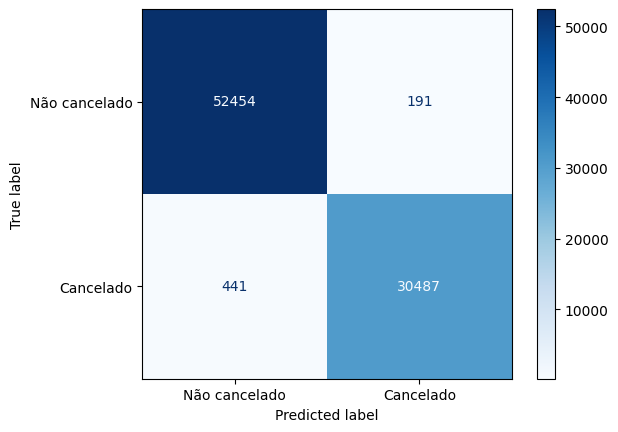

In [19]:
plot_confusion_matrix(y_train, clf.predict(x_train), type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 13.77%
Modelo previu não cancelado, e é não cancelado: 86.23%
Modelo previu não cancelado, mas é cancelado: 22.74%
Modelo previu cancelado, e é cancelado: 77.26%


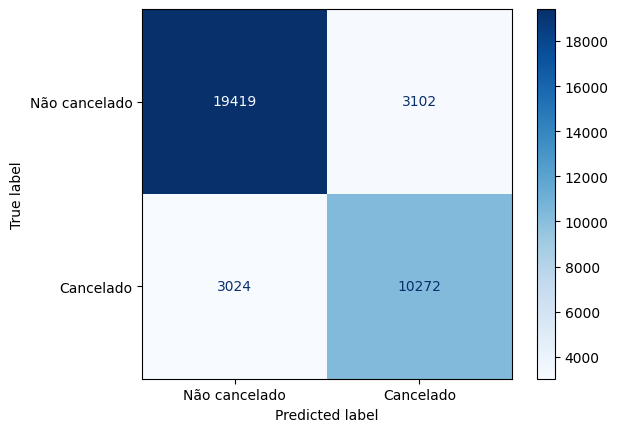

In [20]:
plot_confusion_matrix(y_test, y_pred, type='teste')

Temos uma acurácia interessante de 82,90% com o nosso modelo de árvore de decisão. Vemos também que esse modelo tem mais facilidade em identificar não cancelamentos do que cancelamentos.

Prever mais de 80% dos resultados das reservas corretamente (se vão resultar em cancelamento ou não) parece bem razoável do ponto de vista estratégico para esse hotel. Assim, ele pode realizar estratégias específicas para clientes que tiverem previsão de cancelamento.

No entanto, como vimos na matriz de confusão de testes, o modelo consegue prever apenas cerca de 77% dos cancelamentos, com cerca de 23% dos cancelamentos passando despercebidos pelo modelo, sem nenhuma possibilidade de ação por parte do hotel.

Além disso, cerca de 13% dos clientes que iriam para o hotel normalmente, estão sendo identificados como prováveis cancelamentos.

Por fim, se observarmos as previsões de treino, temos um valor de 99,24%, um ótimo indicador de que nosso modelo está apresentando overfitting com relação à base de treino, o que o impede de generalizar bem para outras bases, como a de testes ou novos casos futuros.

Considerando esses dados, temos motivos de sobra para continuar aprimorando nosso modelo e construir novos com outras técnicas, a fim de melhorar a sua acurácia, ficando atento para evitar o overfitting e garantindo assim maior ganho para o hotel.

Primeiro, vamos utilizar duas técnicas que consistem na poda da nossa árvore de decisão: pré-poda e pós-poda.

## 4. Pré-poda e pós-poda<a name="4"></a>

  Vamos dividir a nossa base novamente, mas dessa vez em treino, validação e teste, pois usaremos a validação para as podas e o teste para avaliar nosso resultado:

In [21]:
X = main_dummies.drop('is_canceled', axis=1)
y = main_dummies.is_canceled

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7412395)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=7412395)

Para sermos justos na nossa comparação, já que utilizaremos novas bases, vamos calcular novamente a acurácia da nossa árvore inicial, sem nenhuma técnica de poda, nas bases de treino e teste:

In [22]:
clf = DecisionTreeClassifier(random_state=7412395)
clf = clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred = clf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 99.27%
Acurácia na base de teste: 81.74%


Continuamos com uma acurácia acima de 99% na base de treino, com uma redução da acurácia para 81,74% na base de teste. Vamos seguir para a pré-poda.

Vamos utilizar a função GridSearchCV para encontrarmos os melhores parâmetros para nossa árvore, no que diz respeito a profundidade máxima (*max_depth*), mínimo de amostras para divisão (*min_samples_split*) e mínimo de amostras por folha (*min_samples_leaf*):

In [23]:
%%time
params = {'max_depth': [2,4,6,8,10,12,14],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4,5]}

clf = DecisionTreeClassifier(random_state=7412395)
gcv = GridSearchCV(estimator=clf,param_grid=params, n_jobs=-1)
gcv.fit(x_train,y_train)

CPU times: user 8.74 s, sys: 2.56 s, total: 11.3 s
Wall time: 42.4 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=7412395), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

Agora vamos calcular a acurácia do modelo encontrado nas bases de treino e teste:

In [24]:
model = gcv.best_estimator_
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 85.48%
Acurácia na base de teste: 83.46%


Perdemos muita acurácia no treino e aumentamos um pouco no teste. Analisando os parâmetros do modelo encontrado, temos que a melhor profundidade máxima foi de 14. Considerando que temos muitas colunas na nossa tabela, pode ser necessário uma profundidade maior.

Vamos tentar encontrar um novo modelo com novos parâmetros:

In [25]:
%%time
params = {'max_depth': [2,6,10,14,16,18,20],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4,5]}

clf = DecisionTreeClassifier(random_state=7412395)
gcv_new = GridSearchCV(estimator=clf,param_grid=params, n_jobs=-1)
gcv_new.fit(x_train,y_train)

CPU times: user 8.76 s, sys: 2.35 s, total: 11.1 s
Wall time: 51.2 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=7412395), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 10, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

Agora vamos calcular a acurácia do novo modelo encontrado nas bases de treino e teste:

In [26]:
model = gcv_new.best_estimator_
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 87.39%
Acurácia na base de teste: 83.52%


Aumentamos a acurácia tanto na base de treino, quanto na de teste, então é provável que os novos parâmetros sejam um pouco melhores.

Vamos observar as matrizes de confusão:

Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 5.73%
Modelo previu não cancelado, e é não cancelado: 94.27%
Modelo previu não cancelado, mas é cancelado: 24.38%
Modelo previu cancelado, e é cancelado: 75.62%


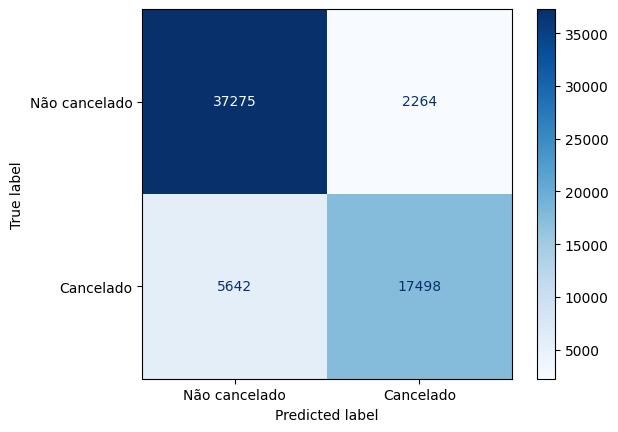

In [27]:
plot_confusion_matrix(y_train, y_pred_train, type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 8.63%
Modelo previu não cancelado, e é não cancelado: 91.37%
Modelo previu não cancelado, mas é cancelado: 29.75%
Modelo previu cancelado, e é cancelado: 70.25%


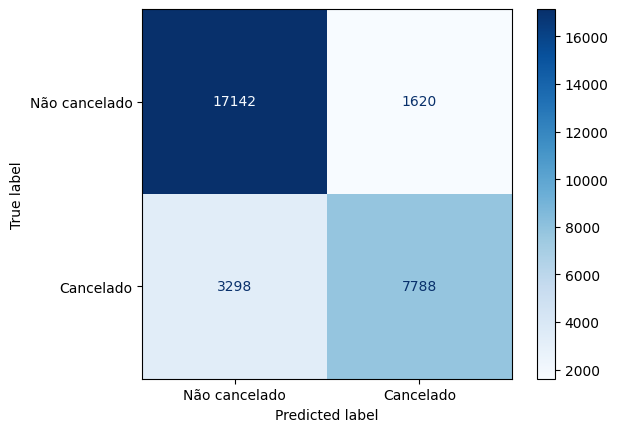

In [28]:
plot_confusion_matrix(y_test, y_pred_test, type='teste')

Apesar do aumento geral na acurácia, tivemos uma piora na qualidade da previsão de cancelamentos, embora a previsão de não cancelamentos tenha melhorado. Vamos verificar se a pós poda melhora esse resultado.

Mas antes, vamos verificar um recorte da árvore para analisar as principais colunas do nosso modelo:

[Text(0.5267857142857143, 0.9, 'deposit_type_Non Refund <= 0.5\ngini = 0.466\nsamples = 62679\nvalue = [39539, 23140]\nclass = Não cancelado'),
 Text(0.2857142857142857, 0.7, 'lead_time <= 14.5\ngini = 0.406\nsamples = 55104\nvalue = [39486, 15618]\nclass = Não cancelado'),
 Text(0.14285714285714285, 0.5, 'lead_time <= 7.5\ngini = 0.22\nsamples = 13932\nvalue = [12179, 1753]\nclass = Não cancelado'),
 Text(0.07142857142857142, 0.3, 'required_car_parking_spaces <= 0.5\ngini = 0.171\nsamples = 10265\nvalue = [9293, 972]\nclass = Não cancelado'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'previous_cancellations <= 0.5\ngini = 0.335\nsamples = 3667\nvalue = [2886, 781]\nclass = Não cancelado'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'previous_cancellations <= 0.5\ngini = 0.447\nsamples = 41172\nvalue = [27307, 13865]\nclass 

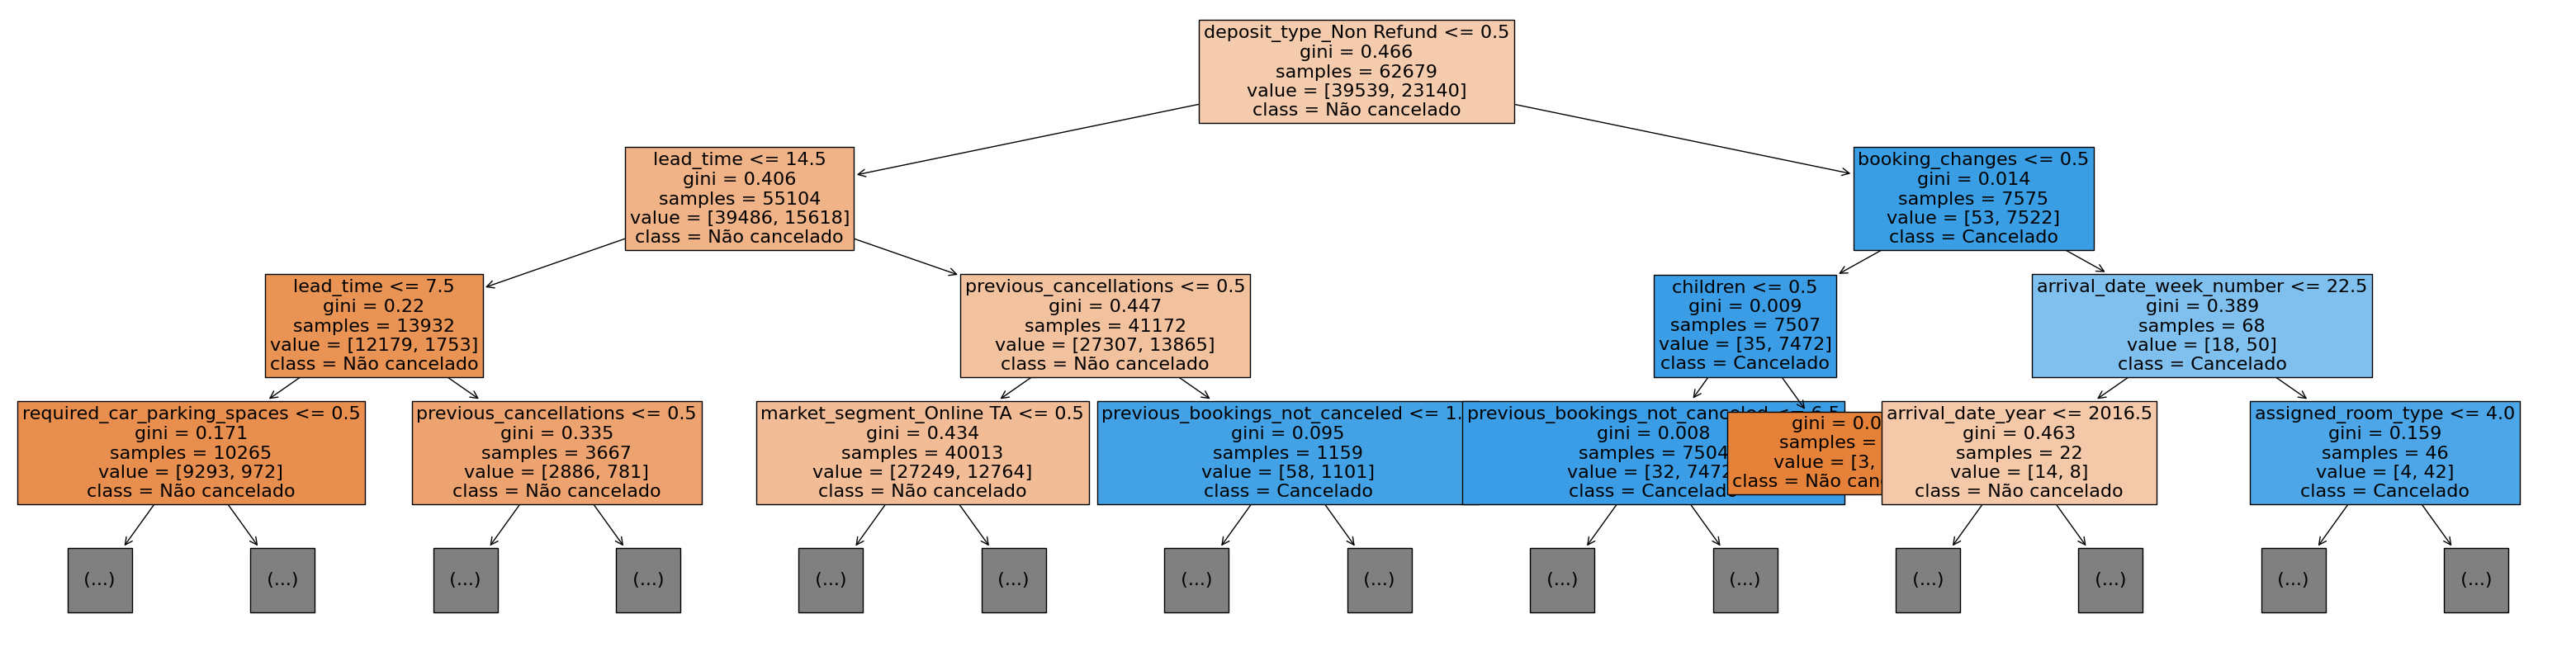

In [29]:
plt.figure(figsize=(40, 10))
plot_tree(model, filled=True, class_names=['Não cancelado', 'Cancelado'], feature_names=list(X.columns.values), max_depth=3, fontsize=16)

In [30]:
importances = model.feature_importances_
tree_importances = pd.Series(importances, index=x_train.columns)
print(tree_importances.sort_values(ascending=False))

deposit_type_Non Refund           0.368288
lead_time                         0.099831
total_of_special_requests         0.078347
market_segment_Online TA          0.059706
previous_cancellations            0.053603
agent                             0.052069
adr                               0.044434
required_car_parking_spaces       0.028198
arrival_date_week_number          0.027335
arrival_date_day_of_month         0.024627
customer_type_Transient           0.020509
booking_changes                   0.018774
arrival_date_year                 0.017127
stays_in_week_nights              0.015622
assigned_room_type                0.015554
reserved_room_type                0.010453
arrival_date_month                0.008620
stays_in_weekend_nights           0.007969
previous_bookings_not_canceled    0.007048
adults                            0.006667
customer_type_Transient-Party     0.005758
meal_HB                           0.003742
hotel_Resort Hotel                0.002723
meal_BB    

Vemos que o modelo coloca um peso muito grande na variável `deposit_type_Non Refund`. Vamos analisar um pouco mais a fundo a relação entre essa variável e os cancelamentos:

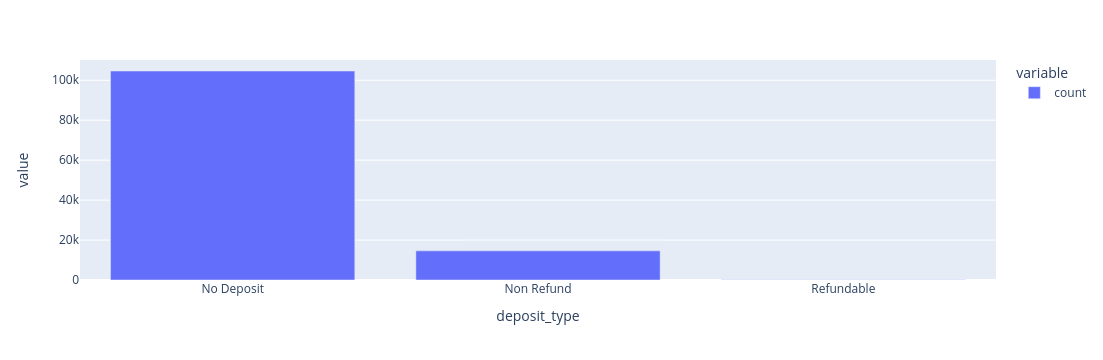

In [31]:
fig = px.bar(main['deposit_type'].value_counts())
fig.show()

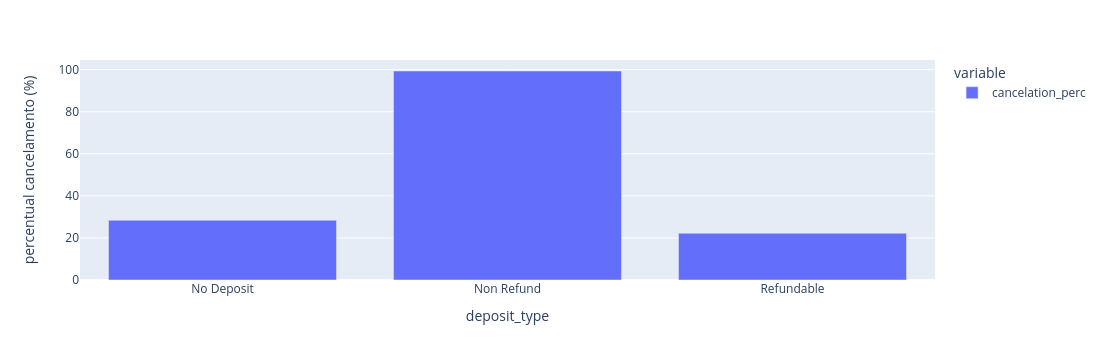

In [32]:
deposit_type_canceled = (main_clean.groupby(['deposit_type']).is_canceled.sum()/main_clean.groupby(['deposit_type']).is_canceled.count()).rename('cancelation_perc')
fig = px.bar(deposit_type_canceled*100, labels={'value': 'percentual cancelamento (%)'})
fig.show()

Temos que mais de 99% dos agendamentos sem reembolso são cancelados. Esse é um dado um tanto quanto contra intuitivo, já que imaginamos que em caso de não reembolso, a taxa de cancelamento deveria ser menor.

Mesmo após a análise do artigo de origem dos dados ([link aqui](https://www.sciencedirect.com/science/article/pii/S2352340918315191])), não foi possível chegar a nenhuma conclusão sobre a validade desse campo. Portanto, vamos considerar que houve alguma falha na obtenção dos dados, e simplesmente remover essa coluna de nossos modelos.

Assim, vamos recalcular todas as árvores que fizemos até aqui, sem esse campo:

In [33]:
main_dummies.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distri

In [34]:
main_dummies = main_dummies.drop([
    'deposit_type_No Deposit',
    'deposit_type_Non Refund',
    'deposit_type_Refundable'
], axis=1)

X = main_dummies.drop('is_canceled', axis=1)
y = main_dummies.is_canceled

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7412395)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=7412395)

clf = DecisionTreeClassifier(random_state=7412395)
clf = clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred = clf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 99.26%
Acurácia na base de teste: 81.61%


In [35]:
%%time
params = {'max_depth': [2,6,10,14,16,18,20],
         'min_samples_split': [2,3,4,5,6],
         'min_samples_leaf': [1,2,3,4,5]}

clf = DecisionTreeClassifier(random_state=7412395)
gcv_new = GridSearchCV(estimator=clf,param_grid=params, n_jobs=-1)
gcv_new.fit(x_train,y_train)

CPU times: user 7.2 s, sys: 1.88 s, total: 9.08 s
Wall time: 48.7 s


GridSearchCV(estimator=DecisionTreeClassifier(random_state=7412395), n_jobs=-1,
             param_grid={'max_depth': [2, 6, 10, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [36]:
model = gcv_new.best_estimator_
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 87.61%
Acurácia na base de teste: 83.27%


[Text(0.5267857142857143, 0.9, 'previous_cancellations <= 0.5\ngini = 0.466\nsamples = 62679\nvalue = [39539, 23140]\nclass = Não cancelado'),
 Text(0.2857142857142857, 0.7, 'lead_time <= 16.5\ngini = 0.447\nsamples = 59268\nvalue = [39246, 20022]\nclass = Não cancelado'),
 Text(0.14285714285714285, 0.5, 'lead_time <= 7.5\ngini = 0.229\nsamples = 14551\nvalue = [12635, 1916]\nclass = Não cancelado'),
 Text(0.07142857142857142, 0.3, 'required_car_parking_spaces <= 0.5\ngini = 0.171\nsamples = 10049\nvalue = [9103, 946]\nclass = Não cancelado'),
 Text(0.03571428571428571, 0.1, '\n  (...)  \n'),
 Text(0.10714285714285714, 0.1, '\n  (...)  \n'),
 Text(0.21428571428571427, 0.3, 'required_car_parking_spaces <= 0.5\ngini = 0.338\nsamples = 4502\nvalue = [3532, 970]\nclass = Não cancelado'),
 Text(0.17857142857142858, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.42857142857142855, 0.5, 'total_of_special_requests <= 0.5\ngini = 0.482\nsamples = 44717\nvalue = [26611, 18106]

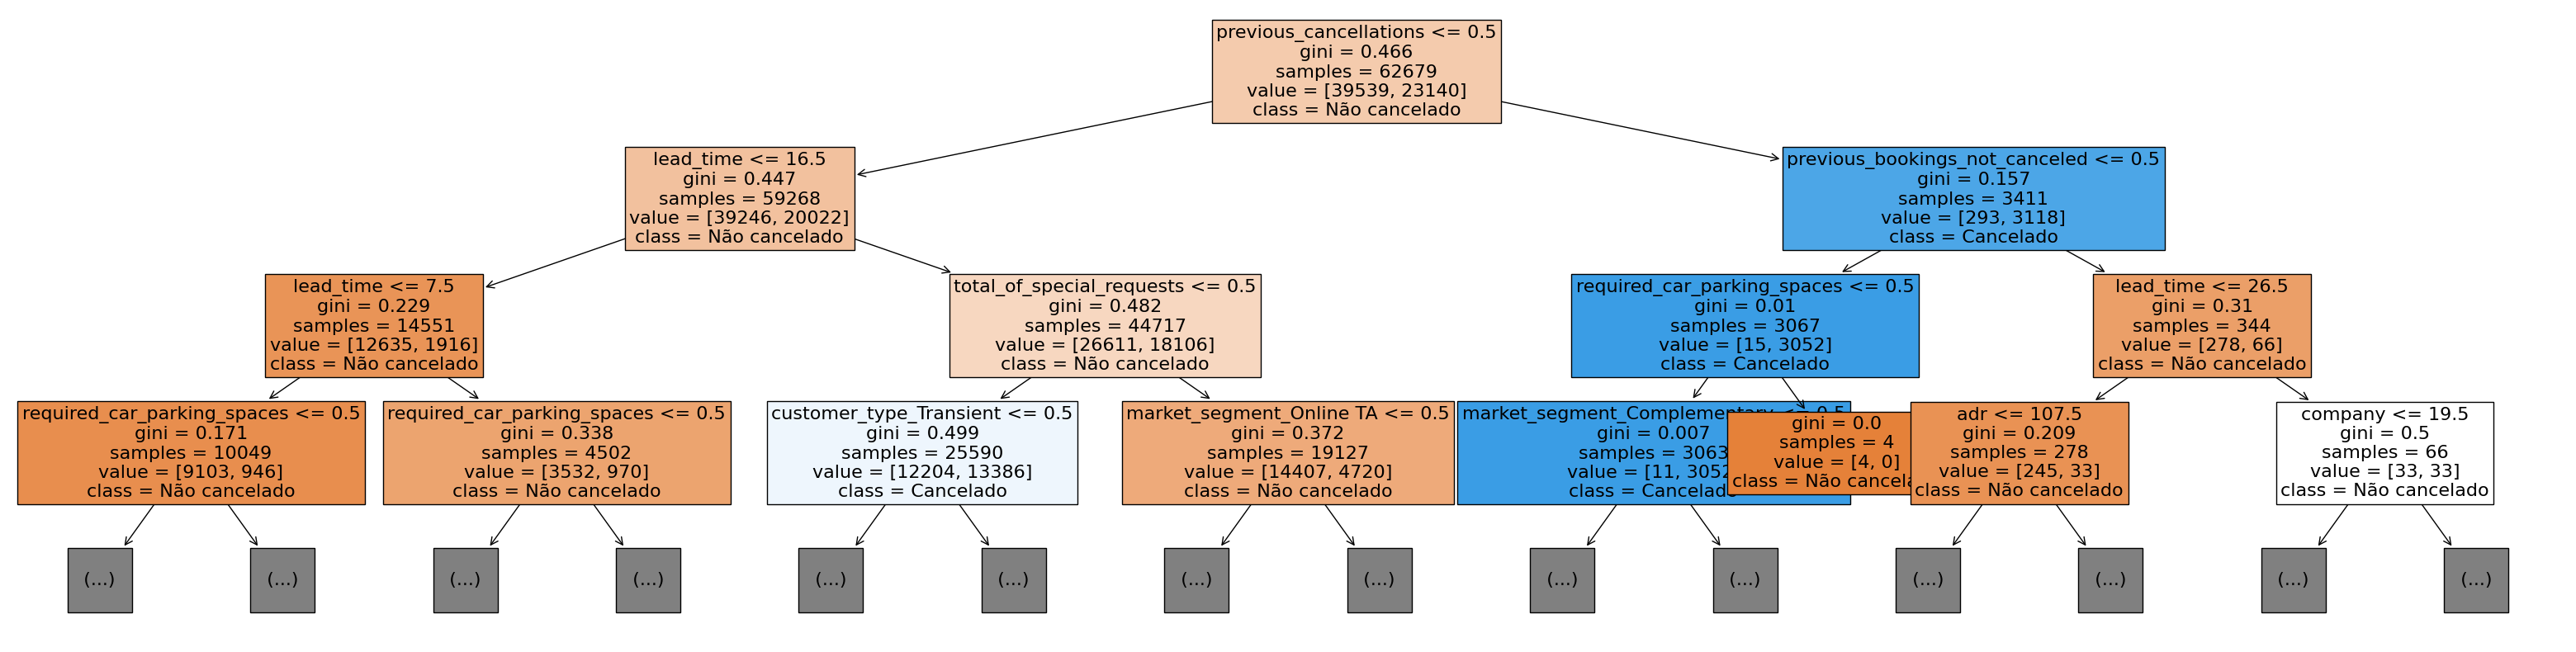

In [37]:
plt.figure(figsize=(40, 10))
plot_tree(model, filled=True, class_names=['Não cancelado', 'Cancelado'], feature_names=list(X.columns.values), max_depth=3, fontsize=16)

In [38]:
importances = model.feature_importances_
tree_importances = pd.Series(importances, index=x_train.columns)
print(tree_importances.sort_values(ascending=False))

lead_time                         0.157683
previous_cancellations            0.115343
total_of_special_requests         0.102034
customer_type_Transient           0.095670
adr                               0.063266
agent                             0.056083
market_segment_Groups             0.055002
assigned_room_type                0.041734
arrival_date_week_number          0.039245
market_segment_Online TA          0.036052
required_car_parking_spaces       0.035333
arrival_date_day_of_month         0.027791
stays_in_week_nights              0.027474
previous_bookings_not_canceled    0.022650
booking_changes                   0.021170
arrival_date_year                 0.016333
reserved_room_type                0.011523
stays_in_weekend_nights           0.009381
distribution_channel_TA/TO        0.007858
arrival_date_month                0.007421
company                           0.007222
adults                            0.007069
meal_BB                           0.006197
meal_HB    

Com a remoção dos campos de depósito, a acurácia na base de treino melhorou (87,39% ->  87.61%) e na base de teste piorou um pouco (83.52% -> 83.27%). De qualquer forma, agora não temos um campo duvidoso no nosso modelo e ele não sofreu grandes alterações na acurácia. 

Temos agora maior equilíbrio entre os campos mais importantes para nossa árvore, que são `lead_time`, `previous_cancellations`, `total_of_special_requests` e `customer_type_Transient`.

Antes de finalizar a pré-poda, vamos visualizar as matrizes de confusão do nosso modelo atual:

Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 6.75%
Modelo previu não cancelado, e é não cancelado: 93.25%
Modelo previu não cancelado, mas é cancelado: 22.04%
Modelo previu cancelado, e é cancelado: 77.96%


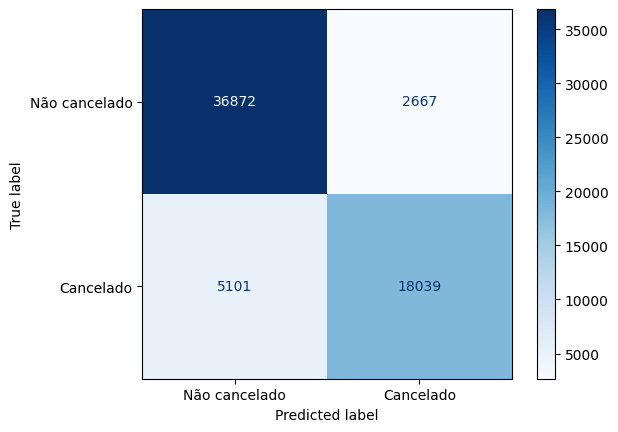

In [39]:
plot_confusion_matrix(y_train, y_pred_train, type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 9.99%
Modelo previu não cancelado, e é não cancelado: 90.01%
Modelo previu não cancelado, mas é cancelado: 28.13%
Modelo previu cancelado, e é cancelado: 71.87%


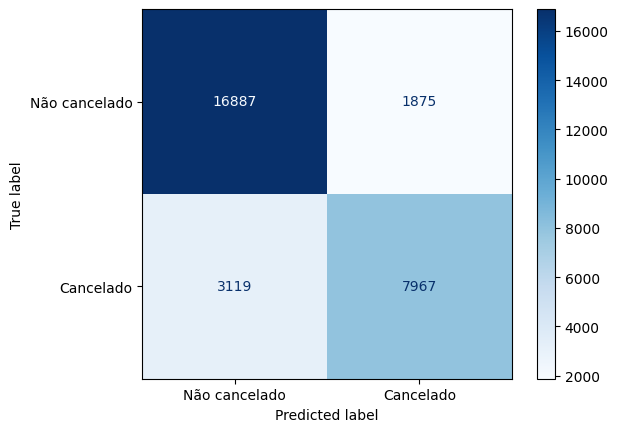

In [40]:
plot_confusion_matrix(y_test, y_pred_test, type='teste')

Tivemos uma melhoria na acurácia das previsões de cancelamento, com uma redução na acurácia das previsões de não cancelamento.

Antes de seguirmos para a etapa de pós-poda, vamos fazer uma redução nas variáveis utilizadas pelo nosso modelo.

Como vimos na lista de importância das variáveis encontrada pela nossa árvore de decisão, muitas contribuem com menos de 1% para explicar a variável independente, então além de atrapalhar o processamento, não são muito úteis para definir a ocorrência de um cancelamento. Vamos portanto selecionar apenas as variáveis que possuem uma importância maior do que 1% e juntas possuem 92% de importância:

In [41]:
main_dummies_best = main_dummies[[
    'lead_time',                         
    'previous_cancellations',            
    'total_of_special_requests',         
    'customer_type_Transient',           
    'adr',                               
    'agent',                             
    'market_segment_Groups',             
    'assigned_room_type',                
    'arrival_date_week_number',          
    'market_segment_Online TA',          
    'required_car_parking_spaces',       
    'arrival_date_day_of_month',         
    'stays_in_week_nights',              
    'previous_bookings_not_canceled',    
    'booking_changes',                   
    'arrival_date_year',                 
    'reserved_room_type',
    'is_canceled'
]]

X = main_dummies_best.drop('is_canceled', axis=1)
y = main_dummies_best.is_canceled

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7412395)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=7412395)

Agora vamos para a pós-poda, avaliando os ccp_alphas com um novo grid:

In [43]:
%%time

# Getting ccp_alphas
clf_post = DecisionTreeClassifier(random_state=7412395, max_depth=16, min_samples_split=2, min_samples_leaf=2)
path = clf_post.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Granting ccp_alphas are unique and positive
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])


# Creating the new tree
clf_post_new = DecisionTreeClassifier(random_state=7412395)

# Creating the grid params with 1 ccp_alpha for each 5 in the list
grid_params = {'ccp_alpha': ccp_alphas[::5]}

# Avaliating ccp_alphas using Grid Search
grid = GridSearchCV(estimator = clf_post_new, param_grid = grid_params, cv=10, n_jobs=-1)
grid.fit(x_validation, y_validation)

# Adding results to a dataframe
results = pd.DataFrame(grid.cv_results_)

CPU times: user 7.98 s, sys: 2.17 s, total: 10.2 s
Wall time: 41.3 s


In [44]:
# Getting the best ccp_alpha
best_ccp = results.iloc[grid.best_index_,4]

# Training a tree with the best ccp_alpha
model = DecisionTreeClassifier(random_state=7412395, ccp_alpha=best_ccp, max_depth=16, min_samples_split=2, min_samples_leaf=2).fit(x_train, y_train)

# Obtendo a previsão da variável resposta para a melhor árvore
y_pred_train = model.predict(x_train)
acc_train = accuracy_score(y_train, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 83.28%
Acurácia na base de teste: 82.75%


Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 6.78%
Modelo previu não cancelado, e é não cancelado: 93.22%
Modelo previu não cancelado, mas é cancelado: 33.69%
Modelo previu cancelado, e é cancelado: 66.31%


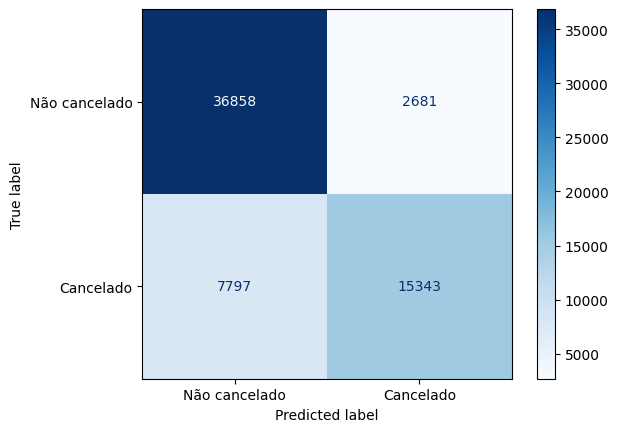

In [45]:
plot_confusion_matrix(y_train, y_pred_train, type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 6.72%
Modelo previu não cancelado, e é não cancelado: 93.28%
Modelo previu não cancelado, mas é cancelado: 35.07%
Modelo previu cancelado, e é cancelado: 64.93%


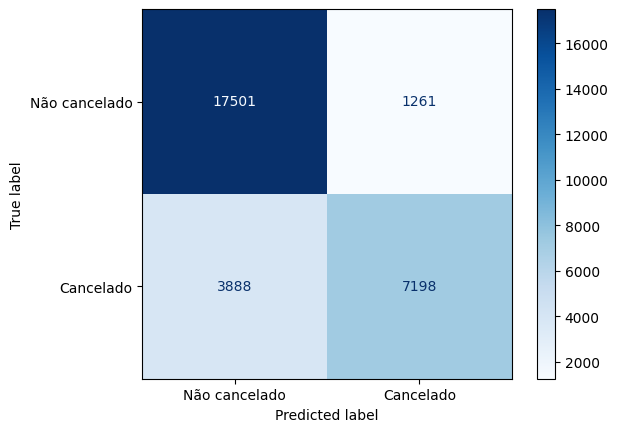

In [46]:
plot_confusion_matrix(y_test, y_pred_test, type='teste')

A acurácia da nossa árvore com os melhores parâmetros e o melhor ccp_alpha encontrado piorou na base de treino (87.61% -> 83,28%) e piorou também na base de teste (83.27% -> 82.75%).

Apesar da piora, é provável que o modelo esteja mais ajustado para bases reais e não corra tanto risco de overfitting, já que a acurácia da base de treino diminuiu muito mais do que a da base de teste, nos fornecendo um modelo mais robusto. 

De qualquer forma, analisando os percentuais de acerto na matriz de confusão, temos que o modelo está prevendo apenas 65% dos cancelamentos (que é o nosso foco), o que nos leva à conclusão de que ele não está apresentando um resultado tão interessante para nossos objetivos nesse momento (em algum ponto atingimos um percentual de quase 80% de acerto).

Antes de prosseguirmos para outro modelo, vamos tentar mais alguns ajustes na nossa árvore de decisão. Primeiro, vamos tentar treinar o modelo na base de treinamento + validação (antes treinamos apenas na de treinamento):

In [47]:
x_train_validation = pd.concat([x_train, x_validation])
y_train_validation = pd.concat([y_train, y_validation])

# Training a tree with the best ccp_alpha
model = DecisionTreeClassifier(random_state=7412395, ccp_alpha=best_ccp, max_depth=16, min_samples_split=2, min_samples_leaf=2).fit(x_train_validation, y_train_validation)

# Obtendo a previsão da variável resposta para a melhor árvore
y_pred_train = model.predict(x_train_validation)
acc_train = accuracy_score(y_train_validation, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 82.92%
Acurácia na base de teste: 82.82%


Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 6.95%
Modelo previu não cancelado, e é não cancelado: 93.05%
Modelo previu não cancelado, mas é cancelado: 34.31%
Modelo previu cancelado, e é cancelado: 65.69%


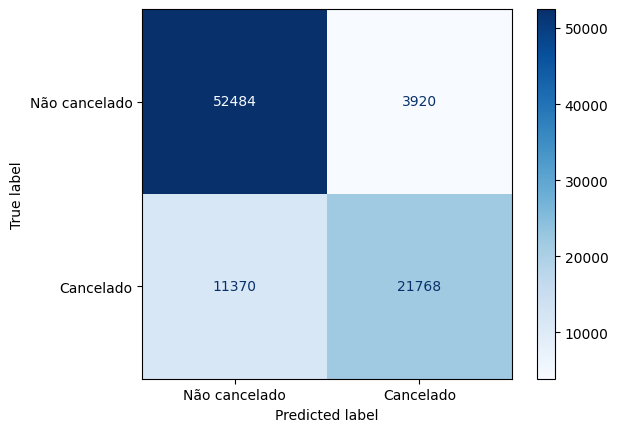

In [48]:
plot_confusion_matrix(y_train_validation, y_pred_train, type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 6.58%
Modelo previu não cancelado, e é não cancelado: 93.42%
Modelo previu não cancelado, mas é cancelado: 35.12%
Modelo previu cancelado, e é cancelado: 64.88%


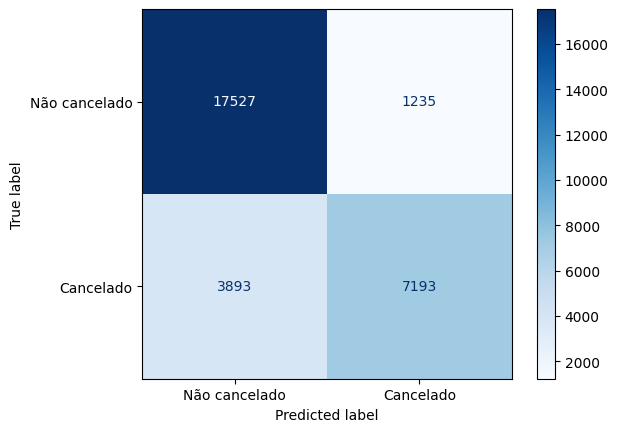

In [49]:
plot_confusion_matrix(y_test, y_pred_test, type='teste')

## 5. Outros ajustes<a name="5"></a>

Observamos uma piora nos treinos (83,28% -> 82.92%) e uma melhora nos testes (82.75% -> 82.82%). No entanto, ainda continuamos com dificuldade de prever os dados de cancelamento.

Vamos verificar como está a distribuição desses cancelamentos dentro das nossas divisões de treino, validação e teste, para entendermos se isso tem algum peso:

In [50]:
print(f'Distribuição de cancelamentos na base de treino: {(y_train.sum()/y_train.count())*100:.2f}')
print(f'Distribuição de cancelamentos na base de validação: {(y_validation.sum()/y_validation.count())*100:.2f}')
print(f'Distribuição de cancelamentos na base de teste: {(y_test.sum()/y_test.count())*100:.2f}')

Distribuição de cancelamentos na base de treino: 36.92
Distribuição de cancelamentos na base de validação: 37.22
Distribuição de cancelamentos na base de teste: 37.14


Temos praticamente a mesma distribuição, em torno de 37%. No entanto, na documentação do scikit-learn ([link aqui](https://scikit-learn.org/stable/modules/tree.html)), temos uma sugestão para balancearmos a árvore, evitando viéses relativos à classe dominante (no nosso caso "não cancelado"). Parece uma tentativa interessante, então vamos realizar esse balanceamento:

In [51]:
# Training a tree with the best ccp_alpha
model = DecisionTreeClassifier(
    random_state=7412395, 
    ccp_alpha=best_ccp, 
    max_depth=16, 
    min_samples_split=2, 
    min_samples_leaf=2,
    class_weight='balanced'
).fit(x_train_validation, y_train_validation)

# Obtendo a previsão da variável resposta para a melhor árvore
y_pred_train = model.predict(x_train_validation)
acc_train = accuracy_score(y_train_validation, y_pred_train)
print('Acurácia na base de treino: {0:.2f}%'.format(acc_train*100))

y_pred_test = model.predict(x_test)
acc_test = accuracy_score(y_test, y_pred_test)
print('Acurácia na base de teste: {0:.2f}%'.format(acc_test*100))

Acurácia na base de treino: 81.53%
Acurácia na base de teste: 81.28%


Acurácias de treino:
Modelo previu cancelado, mas é não cancelado: 17.47%
Modelo previu não cancelado, e é não cancelado: 82.53%
Modelo previu não cancelado, mas é cancelado: 20.17%
Modelo previu cancelado, e é cancelado: 79.83%


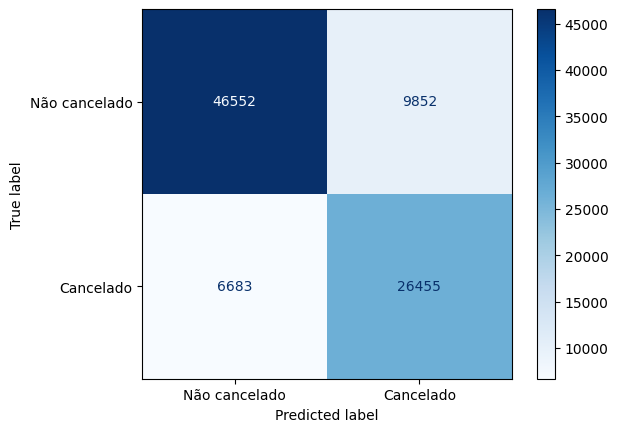

In [52]:
plot_confusion_matrix(y_train_validation, y_pred_train, type='treino')

Acurácias de teste:
Modelo previu cancelado, mas é não cancelado: 17.21%
Modelo previu não cancelado, e é não cancelado: 82.79%
Modelo previu não cancelado, mas é cancelado: 21.27%
Modelo previu cancelado, e é cancelado: 78.73%


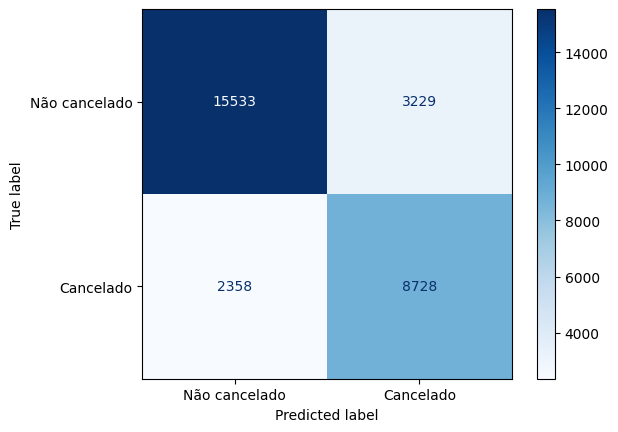

In [53]:
plot_confusion_matrix(y_test, y_pred_test, type='teste')

Com esse parâmetro a mais que busca balancear o modelo de acordo com a frequência das classes, obtivemos uma piora tanto na acurácia de treino (82.92% -> 81.53%), quanto na de teste (82.82% -> 81.28%). No entanto, a capacidade do nosso modelo de prever cancelamentos melhorou muito, tanto nos treinos (65.69% -> 79.83%) quanto nos testes (64.88% -> 78.73%).

Se compararmos nosso modelo atual com o primeiro, temos um modelo com acurácia nos testes que caiu um pouco (82.90% -> 81.28%), porém longe de estar em overfitting com a base de treinamento (foi de 99.24% para 81.53%) e com menos variáveis utilizadas, já que selecionamos apenas as principais encontradas (fomos de cerca de 50 variáveis para 17).

Além disso, temos uma taxa de acerto de cancelamentos melhor do que a primeira árvore, já que saímos de 77.26% de acerto para 78.73%.

## 6. Conclusão<a name="6"></a>

Assim, podemos chegar à conclusão de que temos um modelo que pode ajudar bastante o hotel a prever cancelamentos e fornecer a possibilidade de ações para mitigar esse cancelamento, como:
- Entrar em contato com os clientes confirmando o agendamento;
- Envio de e-mails e mensagens lembrando o agendamento periodicamente;
- Oferecimento de desconto para esses clientes que possuem alta probabilidade de cancelar, caso façam o pagamento antecipado e sem reembolso;

No entanto, apesar de já estarmos entregando valor para o hotel, chegamos a uma acurácia em torno de 80% com uma das técnicas mais básicas de classificação existentes. Fica a questão se com tudo o que aprendemos e definimos aqui sobre os dados, conseguimos obter taxas ainda melhores ao aplicarmos esse conhecimento em conjunto com outros algoritmos e técnicas, como PCA, SVM, Random Forest e Gradient Boosting.

Esse trabalho será continuado em outros notebooks.

O próximo notebook pode ser acessado aqui: link

Abaixo, temos o código para exportar os dados limpos que utilizamos para o formato csv, caso necessário:

In [416]:
# main_final_cleaned = main_final.drop([
#     'reservation_status',
#     'reservation_status_date',
#     'deposit_type'
# ], axis=1)

# dict_months = {'January': 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8, "September": 9, "October": 10,
#        "November": 11, "December": 12}

# dict_room_type = {
#     'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'P': 13
# }


# main_final_cleaned = main_final_cleaned.replace({
#     "arrival_date_month": dict_months, 'reserved_room_type': dict_room_type, 'assigned_room_type': dict_room_type
# })

# main_final_cleaned.to_csv('hotel_bookings_cleaned.csv', index=False)


/tmp/ipykernel_12568/1334674234.py:15: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

